# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## **Scrapping Movies Data**

In [ ]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url,headers={'User-Agent':'Mozilla/5.0'})
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

In [ ]:
#scraping all internal movie link path from homepage
anchor_tags = soup.find_all('a' , class_ = 'title-list-grid__item--link')



#storing internal movie link  in a list
url_path = []
for tag in anchor_tags :
  url_path.append(tag['href'])

url_path

['/in/movie/stree-2',
 '/in/movie/tumbbad',
 '/in/movie/deadpool-3',
 '/in/movie/kill-2024',
 '/in/movie/sector-36',
 '/in/movie/stree',
 '/in/movie/thalapathy-68',
 '/in/movie/thangalaan',
 '/in/movie/saripodhaa-sanivaaram',
 '/in/movie/untitled-vicky-kaushal-prime-video-project',
 '/in/movie/khel-khel-mein',
 '/in/movie/munjha',
 '/in/movie/siddharth-roy',
 '/in/movie/inside-out-2',
 '/in/movie/nunakuzhi',
 '/in/movie/laila-majnu',
 '/in/movie/ulajh',
 '/in/movie/ntr-30',
 '/in/movie/vaazha',
 '/in/movie/double-ismart',
 '/in/movie/vedaa',
 '/in/movie/prisoners',
 '/in/movie/aavesham-2024',
 '/in/movie/mathu-vadalara',
 '/in/movie/ctrl-2024',
 '/in/movie/mr-bachchan',
 '/in/movie/the-fall-guy',
 '/in/movie/thalavan',
 '/in/movie/kalinga-2024',
 '/in/movie/it-ends-with-us',
 '/in/movie/raayan',
 '/in/movie/je-jatt-vigad-gya',
 '/in/movie/salaar',
 '/in/movie/gifted',
 '/in/movie/the-buckingham-murders',
 '/in/movie/pechi',
 '/in/movie/365-days',
 '/in/movie/auron-mein-kahan-dumtha',
 

In [ ]:

#storing www.justwatch movie links in movie_urls by concatenating homepage link with internal link of movie
movie_urls = []

for path in url_path:
  movie_urls.append('https://www.justwatch.com{}'.format(path))


movie_urls


['https://www.justwatch.com/in/movie/stree-2',
 'https://www.justwatch.com/in/movie/tumbbad',
 'https://www.justwatch.com/in/movie/deadpool-3',
 'https://www.justwatch.com/in/movie/kill-2024',
 'https://www.justwatch.com/in/movie/sector-36',
 'https://www.justwatch.com/in/movie/stree',
 'https://www.justwatch.com/in/movie/thalapathy-68',
 'https://www.justwatch.com/in/movie/thangalaan',
 'https://www.justwatch.com/in/movie/saripodhaa-sanivaaram',
 'https://www.justwatch.com/in/movie/untitled-vicky-kaushal-prime-video-project',
 'https://www.justwatch.com/in/movie/khel-khel-mein',
 'https://www.justwatch.com/in/movie/munjha',
 'https://www.justwatch.com/in/movie/siddharth-roy',
 'https://www.justwatch.com/in/movie/inside-out-2',
 'https://www.justwatch.com/in/movie/nunakuzhi',
 'https://www.justwatch.com/in/movie/laila-majnu',
 'https://www.justwatch.com/in/movie/ulajh',
 'https://www.justwatch.com/in/movie/ntr-30',
 'https://www.justwatch.com/in/movie/vaazha',
 'https://www.justwatch.c

In [ ]:





#creating a  function to scrape h3 tags containing movie info on each movie site
def get_detail(soup, header_text):
      header = soup.find('h3', string=header_text)
      if header:
          sibling = header.find_next_sibling()
          if sibling:
              return sibling.get_text()
      return None

#creating a function to scrape and store info from diffferent links
def scrape_url(url):
    response = requests.get(url,headers={'User-Agent':'Mozilla/5.0'})
    if response.status_code == 200:                                  # if successful http request
        soup = BeautifulSoup(response.content, 'html.parser')

        #scraping h1 title tag
        title_tag = soup.find('h1')
        title = title_tag.get_text(strip=True)

        #scraping release year
        release_year = soup.find('span' , class_='text-muted')




        #scraping streaming platform
        stream_data = []
        stream_div = soup.find('a', class_='offer')

        if stream_div:
          a_tag = stream_div.find_all('a', class_='offer')
          for tag in a_tag:
            img_tag = tag.find('img')
            if True:
              stream_data.append(img_tag['alt'])
        else:
          stream_data.append('N/A')




        # Extracting the details of imdb_rating , genres, runtime, age_rating, production_country, director
        iMDB_Rating = get_detail(soup, 'Rating')
        if iMDB_Rating:
          iMDB_Rating = iMDB_Rating.strip().split()[0]


        genres = get_detail(soup, 'Genres')
        runtime = get_detail(soup, 'Runtime')
        age_rating = get_detail(soup, 'Age rating')
        production_country  = get_detail(soup, ' Production country ')
        director = get_detail(soup, 'Director')
        #stream = []
        return{
            'movie_url':url,
            'Titles' : title,
            'Release_year' : release_year,
            'IMDB_Rating' :iMDB_Rating,
            'Genre' :genres,
            'Runtime' : runtime,
            'Age_rating' : age_rating,
            'Production_country' : production_country,
            'streaming platform' : stream_data,
            'Director': director


        }

    else:
        return None


In [ ]:

#storing all information scraped from url page in data variable
data = []
for url in movie_urls:
  result = scrape_url(url)
  if result:
    data.append(result)

  time.sleep(2)  # To avoid overwhelming the server and getting blocked



In [ ]:
print(len(data))
#creating movie dataframe
movie_df = pd.DataFrame(data)

# for rating in df['IMDB_Rating']:
#   if rating:
#     ratings.append(float(rating.strip().split()[0]))
#   else:
#     ratings.append(np.nan)


# df['cleaned rating']=ratings
movie_df



100


,movie_url,Titles,Release_year,IMDB_Rating,Genre,Runtime,Age_rating,Production_country,streaming platform,Director
0,https://www.justwatch.com/in/movie/stree-2,Stree 2: Sarkate Ka Aatank(2024),None,7.3,"Horror, Comedy",2h 27min,UA,India,[],Amar Kaushik
1,https://www.justwatch.com/in/movie/tumbbad,Tumbbad(2018),None,8.2,"Fantasy, Horror, Mystery & Thriller, Drama, Ma...",1h 53min,A,"India, Sweden",[],Rahi Anil Barve
2,https://www.justwatch.com/in/movie/deadpool-3,Deadpool & Wolverine(2024),None,7.8,"Comedy, Science-Fiction, Action & Adventure",2h 8min,A,United States,[],Shawn Levy
3,https://www.justwatch.com/in/movie/kill-2024,Kill(2024),None,7.6,"Action & Adventure, Crime, Drama, Mystery & Th...",1h 45min,A,India,[],Nikhil Nagesh Bhat
4,https://www.justwatch.com/in/movie/sector-36,Sector 36(2024),None,7.2,"Mystery & Thriller, Drama, Crime",2h 4min,A,India,[],None
...,...,...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/movie/aattam,Aattam(2024),None,8.2,"Mystery & Thriller, Drama",2h 19min,UA,India,[],Anand Ekarshi
96,https://www.justwatch.com/in/movie/pussy-island,Blink Twice(2024),None,6.5,"Horror, Mystery & Thriller",1h 43min,A,United States,[],Zoë Kravitz
97,https://www.justwatch.com/in/movie/land-of-bad,Land of Bad(2024),None,6.6,"Mystery & Thriller, Action & Adventure, War & ...",1h 53min,A,"Czech Republic, United States, Australia",[],William Eubank
98,https://www.justwatch.com/in/movie/untitled-so...,Sarfira(2024),None,7.8,Drama,2h 35min,U,India,[],Sudha Kongara Prasad


In [ ]:
import re

movie_df

#function to extract movie name and year from Titles column
def extract_movie_year(movie_string):
    match = re.match(r'(.+)\((\d{4})\)', movie_string)
    if match:
        return match.group(1), match.group(2)
    else:
        return None, None

# Apply the function to each row in the 'Titles' column
movie_df[['Movie_Name', 'Movie_release_Year']] = movie_df['Titles'].apply(lambda x: pd.Series(extract_movie_year(x)))

movie_df.drop(columns=['Release_year'])

,movie_url,Titles,IMDB_Rating,Genre,Runtime,Age_rating,Production_country,streaming platform,Director,Movie_Name,Movie_release_Year
0,https://www.justwatch.com/in/movie/stree-2,Stree 2: Sarkate Ka Aatank(2024),7.3,"Horror, Comedy",2h 27min,UA,India,[],Amar Kaushik,Stree 2: Sarkate Ka Aatank,2024
1,https://www.justwatch.com/in/movie/tumbbad,Tumbbad(2018),8.2,"Fantasy, Horror, Mystery & Thriller, Drama, Ma...",1h 53min,A,"India, Sweden",[],Rahi Anil Barve,Tumbbad,2018
2,https://www.justwatch.com/in/movie/deadpool-3,Deadpool & Wolverine(2024),7.8,"Comedy, Science-Fiction, Action & Adventure",2h 8min,A,United States,[],Shawn Levy,Deadpool & Wolverine,2024
3,https://www.justwatch.com/in/movie/kill-2024,Kill(2024),7.6,"Action & Adventure, Crime, Drama, Mystery & Th...",1h 45min,A,India,[],Nikhil Nagesh Bhat,Kill,2024
4,https://www.justwatch.com/in/movie/sector-36,Sector 36(2024),7.2,"Mystery & Thriller, Drama, Crime",2h 4min,A,India,[],None,Sector 36,2024
...,...,...,...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/movie/aattam,Aattam(2024),8.2,"Mystery & Thriller, Drama",2h 19min,UA,India,[],Anand Ekarshi,Aattam,2024
96,https://www.justwatch.com/in/movie/pussy-island,Blink Twice(2024),6.5,"Horror, Mystery & Thriller",1h 43min,A,United States,[],Zoë Kravitz,Blink Twice,2024
97,https://www.justwatch.com/in/movie/land-of-bad,Land of Bad(2024),6.6,"Mystery & Thriller, Action & Adventure, War & ...",1h 53min,A,"Czech Republic, United States, Australia",[],William Eubank,Land of Bad,2024
98,https://www.justwatch.com/in/movie/untitled-so...,Sarfira(2024),7.8,Drama,2h 35min,U,India,[],Sudha Kongara Prasad,Sarfira,2024


## **Scraping TV  Show Data**

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import time
import pandas as pd
import numpy as np

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url,headers={'User-Agent':'Mozilla/5.0'})
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())



<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

In [ ]:
#scraping all internal tv link path from homepage
anchor_tags = soup.find_all('a' , class_ = 'title-list-grid__item--link')

anchor_tags


#storing internal tv links  in a list
tv_url_path = []
for tag in anchor_tags :
  tv_url_path.append(tag['href'])

tv_url_path

['/in/tv-show/from',
 '/in/tv-show/taaza-khabar',
 '/in/tv-show/the-penguin',
 '/in/tv-show/mirzapur',
 '/in/tv-show/the-lord-of-the-rings-the-rings-of-power',
 '/in/tv-show/adams-sweet-agony',
 '/in/tv-show/shogun-2024',
 '/in/tv-show/gyaarah-gyaarah',
 '/in/tv-show/the-old-man',
 '/in/tv-show/call-me-bae',
 '/in/tv-show/agatha-house-of-harkness',
 '/in/tv-show/game-of-thrones',
 '/in/tv-show/nobody-wants-this',
 '/in/tv-show/tulsa-king',
 '/in/tv-show/bigg-boss',
 '/in/tv-show/panchayat',
 '/in/tv-show/x-x-x-uncensored',
 '/in/tv-show/house-of-the-dragon',
 '/in/tv-show/dan-da-dan',
 '/in/tv-show/ic-814',
 '/in/tv-show/untitled-kapil-sharma-netflix-project',
 '/in/tv-show/mastram',
 '/in/tv-show/only-murders-in-the-building',
 '/in/tv-show/the-boys',
 '/in/tv-show/tell-me-lies',
 '/in/tv-show/monsters-the-lyle-and-erik-menendez-story',
 '/in/tv-show/breaking-bad',
 '/in/tv-show/farzi',
 '/in/tv-show/attack-on-titan',
 '/in/tv-show/slow-horses',
 '/in/tv-show/apharan',
 '/in/tv-show/i

In [ ]:
#storing www.justwatch  tv links in movie_urls
tv_urls = []

for path in tv_url_path:
  tv_urls.append('https://www.justwatch.com{}'.format(path))

tv_urls

['https://www.justwatch.com/in/tv-show/from',
 'https://www.justwatch.com/in/tv-show/taaza-khabar',
 'https://www.justwatch.com/in/tv-show/the-penguin',
 'https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/the-lord-of-the-rings-the-rings-of-power',
 'https://www.justwatch.com/in/tv-show/adams-sweet-agony',
 'https://www.justwatch.com/in/tv-show/shogun-2024',
 'https://www.justwatch.com/in/tv-show/gyaarah-gyaarah',
 'https://www.justwatch.com/in/tv-show/the-old-man',
 'https://www.justwatch.com/in/tv-show/call-me-bae',
 'https://www.justwatch.com/in/tv-show/agatha-house-of-harkness',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/nobody-wants-this',
 'https://www.justwatch.com/in/tv-show/tulsa-king',
 'https://www.justwatch.com/in/tv-show/bigg-boss',
 'https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/x-x-x-uncensored',
 'https://www.justwatch.com/in/tv-show/house-o

In [ ]:
len(tv_urls)

100

In [ ]:
#creating a  function to scrape h3 tags containing tv info on each movie site
def get_detail(soup, header_text):
      header = soup.find('h3', string=header_text)
      if header:
          sibling = header.find_next_sibling()
          if sibling:
              return sibling.get_text()
      return None

#creating a function to scrape and store info from diffferent links
def scrape_url(url):
    response = requests.get(url,headers={'User-Agent':'Mozilla/5.0'})
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')
        #scraping h1 title tag
        title_tag = soup.find('h1')
        title = title_tag.get_text(strip=True)

        ##scraping release year
        release_year = soup.find('span' , class_='text-muted')




        #scraping streaming platform
        stream_data = []
        stream_div =soup.find('div', class_='buybox-row stream')

        if stream_div:
          a_tag = stream_div.find_all('a', class_='offer')
          for tag in a_tag:
            img_tag = tag.find('img')
            if True:
              stream_data.append(img_tag['alt'])
        else:
          stream_data.append('N/A')




        # Extracting the details  of imdb_rating , genres, runtime, production_country
        iMDB_Rating = get_detail(soup, 'Rating')
        if iMDB_Rating:
          iMDB_Rating = iMDB_Rating.strip().split()[0]
        genres = get_detail(soup, 'Genres')
        runtime = get_detail(soup, 'Runtime')
        #age_rating = get_detail(soup, 'Age rating')
        production_country  = get_detail(soup, ' Production country ')
        #director = get_detail(soup, 'Director')

        return{
            'movie_url':url,
            'Titles' : title,
            'Release_year' : release_year,
            'IMDB_Rating' :iMDB_Rating,
            'Genre' :genres,
            'Runtime' : runtime,
            #'Age_rating' : age_rating,
            'Production_country' : production_country,
            'streaming platform' : stream_data,
            #'Director': director


        }

    else:
        return None

In [ ]:
#storing all information in data var

data = []
for url in tv_urls:
  result = scrape_url(url)
  if result:
    data.append(result)

  time.sleep(2)  # To avoid overwhelming the server and getting blocked


In [ ]:
#creating tv dataframe
tv_df = pd.DataFrame(data)
tv_df

,movie_url,Titles,Release_year,IMDB_Rating,Genre,Runtime,Production_country,streaming platform
0,https://www.justwatch.com/in/tv-show/from,From(2022),None,7.8,"Drama, Horror, Science-Fiction, Mystery & Thri...",49min,United States,[Amazon Prime Video]
1,https://www.justwatch.com/in/tv-show/taaza-khabar,Taaza Khabar(2023),None,8.1,"Drama, Science-Fiction, Mystery & Thriller, Ac...",33min,India,[Hotstar]
2,https://www.justwatch.com/in/tv-show/the-penguin,The Penguin(2024),None,8.8,"Drama, Fantasy, Crime",1h 1min,United States,[Jio Cinema]
3,https://www.justwatch.com/in/tv-show/mirzapur,Mirzapur(2018),None,8.4,"Action & Adventure, Drama, Mystery & Thriller,...",50min,India,[Amazon Prime Video]
4,https://www.justwatch.com/in/tv-show/the-lord-...,The Lord of the Rings: The Rings of Power(2022),None,6.9,"Action & Adventure, Science-Fiction, Drama, Fa...",1h 8min,United States,[Amazon Prime Video]
...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/tv-show/how-i-met...,How I Met Your Mother(2005),None,8.3,"Comedy, Drama, Romance",24min,United States,[Hotstar]
96,https://www.justwatch.com/in/tv-show/sultan-of...,Sultan of Delhi(2023),None,5.5,"Action & Adventure, Drama",36min,India,[Hotstar]
97,https://www.justwatch.com/in/tv-show/prison-break,Prison Break(2005),None,8.3,"Action & Adventure, Crime, Drama, Mystery & Th...",50min,United States,[Hotstar]
98,https://www.justwatch.com/in/tv-show/life-hill...,Life Hill Gayi(2024),None,6.5,"Comedy, Romance",34min,India,[Hotstar]


In [ ]:
import pandas as pd
import re


# Function to extract show name and year from Titles column
def extract_show_year(show_string):
    match = re.match(r'(.+)\((\d{4})\)', show_string)
    if match:
        return match.group(1), match.group(2)
    else:
        return None, None

# Apply the function to each row in the 'Show' column
tv_df[['Show_Name', 'Show_Year']] = tv_df['Titles'].apply(lambda x: pd.Series(extract_show_year(x)))

# Display the updated DataFrame
tv_df

tv_df.drop(columns=['Release_year'])

,movie_url,Titles,IMDB_Rating,Genre,Runtime,Production_country,streaming platform,Show_Name,Show_Year
0,https://www.justwatch.com/in/tv-show/from,From(2022),7.8,"Drama, Horror, Science-Fiction, Mystery & Thri...",49min,United States,[Amazon Prime Video],From,2022
1,https://www.justwatch.com/in/tv-show/taaza-khabar,Taaza Khabar(2023),8.1,"Drama, Science-Fiction, Mystery & Thriller, Ac...",33min,India,[Hotstar],Taaza Khabar,2023
2,https://www.justwatch.com/in/tv-show/the-penguin,The Penguin(2024),8.8,"Drama, Fantasy, Crime",1h 1min,United States,[Jio Cinema],The Penguin,2024
3,https://www.justwatch.com/in/tv-show/mirzapur,Mirzapur(2018),8.4,"Action & Adventure, Drama, Mystery & Thriller,...",50min,India,[Amazon Prime Video],Mirzapur,2018
4,https://www.justwatch.com/in/tv-show/the-lord-...,The Lord of the Rings: The Rings of Power(2022),6.9,"Action & Adventure, Science-Fiction, Drama, Fa...",1h 8min,United States,[Amazon Prime Video],The Lord of the Rings: The Rings of Power,2022
...,...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/tv-show/how-i-met...,How I Met Your Mother(2005),8.3,"Comedy, Drama, Romance",24min,United States,[Hotstar],How I Met Your Mother,2005
96,https://www.justwatch.com/in/tv-show/sultan-of...,Sultan of Delhi(2023),5.5,"Action & Adventure, Drama",36min,India,[Hotstar],Sultan of Delhi,2023
97,https://www.justwatch.com/in/tv-show/prison-break,Prison Break(2005),8.3,"Action & Adventure, Crime, Drama, Mystery & Th...",50min,United States,[Hotstar],Prison Break,2005
98,https://www.justwatch.com/in/tv-show/life-hill...,Life Hill Gayi(2024),6.5,"Comedy, Romance",34min,India,[Hotstar],Life Hill Gayi,2024


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
tv_df['IMDB_Rating'].isna().sum()

1

In [ ]:
tv_df.dropna(subset=['IMDB_Rating'], inplace=True)

In [ ]:
movie_df['IMDB_Rating'].isna().sum()

0

In [ ]:

# Function to check if a string can be converted to float

def is_float(value):
    try:
        float(value)
        return True
    except ValueError:
        return False


tv_df= tv_df[tv_df['IMDB_Rating'].apply(is_float)]

tv_df['IMDB_Rating'].astype(float)

tv_df[tv_df['IMDB_Rating'].astype(float) >= 7]['Titles']

,Titles
0,From(2022)
1,Taaza Khabar(2023)
2,The Penguin(2024)
3,Mirzapur(2018)
6,Shōgun(2024)
...,...
91,Dexter(2006)
92,You(2018)
93,Bleach: Thousand-Year Blood War(2022)
95,How I Met Your Mother(2005)


In [ ]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movie_url           100 non-null    object
 1   Titles              100 non-null    object
 2   Release_year        0 non-null      object
 3   IMDB_Rating         100 non-null    object
 4   Genre               100 non-null    object
 5   Runtime             100 non-null    object
 6   Age_rating          75 non-null     object
 7   Production_country  100 non-null    object
 8   streaming platform  100 non-null    object
 9   Director            92 non-null     object
 10  Movie_Name          100 non-null    object
 11  Movie_release_Year  100 non-null    object
 12  Movie_Year          100 non-null    int64 
dtypes: int64(1), object(12)
memory usage: 10.3+ KB


In [ ]:
tv_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movie_url           97 non-null     object
 1   Titles              97 non-null     object
 2   Release_year        0 non-null      object
 3   IMDB_Rating         97 non-null     object
 4   Genre               97 non-null     object
 5   Runtime             97 non-null     object
 6   Production_country  97 non-null     object
 7   streaming platform  97 non-null     object
 8   Show_Name           97 non-null     object
 9   Show_Year           97 non-null     int64 
dtypes: int64(1), object(9)
memory usage: 8.3+ KB


In [ ]:
movie_df['Movie_Year'] = movie_df['Movie_release_Year'].astype(int)

# coverting movie_year column in both dataframes into a number datatype

tv_df['Show_Year'] = tv_df['Show_Year'].astype(int)

<ipython-input-31-b7e54de8f57d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_df['Show_Year'] = tv_df['Show_Year'].astype(int)


In [ ]:
tv_df[tv_df['IMDB_Rating'].astype(float) >= 7]['Titles'].to_list()    # tv shows which are havinIMDB rating more than 7

['From(2022)',
 'Taaza Khabar(2023)',
 'The Penguin(2024)',
 'Mirzapur(2018)',
 'Shōgun(2024)',
 'Gyaarah Gyaarah(2024)',
 'The Old Man(2022)',
 'Game of Thrones(2011)',
 'Nobody Wants This(2024)',
 'Tulsa King(2022)',
 'Panchayat(2020)',
 'House of the Dragon(2022)',
 'DAN DA DAN(2024)',
 'Only Murders in the Building(2021)',
 'The Boys(2019)',
 'Monsters: The Lyle and Erik Menendez Story(2024)',
 'Breaking Bad(2008)',
 'Farzi(2023)',
 'Attack on Titan(2013)',
 'Slow Horses(2022)',
 'Apharan(2018)',
 'Into the Fire: The Lost Daughter(2024)',
 'The Judge from Hell(2024)',
 'Money Heist(2017)',
 'Demon Slayer: Kimetsu no Yaiba(2019)',
 'The Rookie(2018)',
 'Love Next Door(2024)',
 'Highway Love(2023)',
 'Gyeongseong Creature(2023)',
 'Naruto Shippūden(2007)',
 'Person of Interest(2011)',
 'Heartstopper(2022)',
 'Dark(2017)',
 'Lost(2004)',
 'Shekhar Home(2024)',
 'The Flash(2014)',
 'Asur: Welcome to Your Dark Side(2020)',
 'No Gain No Love(2024)',
 'Sunflower(2021)',
 'Euphoria(2019)',

In [ ]:
movie_df[movie_df['IMDB_Rating'].astype(float) >= 7]['Titles'].to_list() #movies which are havin IMDB rating more than 7

['Stree 2: Sarkate Ka Aatank(2024)',
 'Tumbbad(2018)',
 'Deadpool & Wolverine(2024)',
 'Kill(2024)',
 'Sector 36(2024)',
 'Stree(2018)',
 'Thangalaan(2024)',
 'Saripodhaa Sanivaaram(2024)',
 'Khel Khel Mein(2024)',
 'Siddharth Roy(2024)',
 'Inside Out 2(2024)',
 'Laila Majnu(2018)',
 'Vaazha: Biopic of a Billion Boys(2024)',
 'Prisoners(2013)',
 'Aavesham(2024)',
 'Mathu Vadalara(2019)',
 'Thalavan(2024)',
 'Kalinga(2024)',
 'Gifted(2017)',
 'The Buckingham Murders(2024)',
 'Auron Mein Kahan Dum Tha(2024)',
 'Kishkindha Kaandam(2024)',
 'Maharaja(2024)',
 'Challengers(2024)',
 'Committee Kurrollu(2024)',
 'Demonte Colony(2015)',
 'Joker(2019)',
 'Laapataa Ladies(2024)',
 'Vaazhai(2024)',
 'Berlin(2023)',
 'The Substance(2024)',
 'Bramayugam(2024)',
 'Golam(2024)',
 'Furiosa: A Mad Max Saga(2024)',
 'Dune: Part Two(2024)',
 'His Three Daughters(2024)',
 'Welcome Home(2020)',
 'Apocalypto(2006)',
 "Harry Potter and the Philosopher's Stone(2001)",
 'Chandu Champion(2024)',
 'Oppenheimer(2

Among all 100 popular movies extracted , 57 of them have rating 7 or higher

Among all 100 popular tv shows extracted  , 77 of them have rating 7 or higher

In [ ]:
#extracting movies released in last two years
movie_df[movie_df['Movie_Year'] > 2022]



,movie_url,Titles,Release_year,IMDB_Rating,Genre,Runtime,Age_rating,Production_country,streaming platform,Director,Movie_Name,Movie_release_Year,Movie_Year
0,https://www.justwatch.com/in/movie/stree-2,Stree 2: Sarkate Ka Aatank(2024),None,7.3,"Horror, Comedy",2h 27min,UA,India,[],Amar Kaushik,Stree 2: Sarkate Ka Aatank,2024,2024
2,https://www.justwatch.com/in/movie/deadpool-3,Deadpool & Wolverine(2024),None,7.8,"Comedy, Science-Fiction, Action & Adventure",2h 8min,A,United States,[],Shawn Levy,Deadpool & Wolverine,2024,2024
3,https://www.justwatch.com/in/movie/kill-2024,Kill(2024),None,7.6,"Action & Adventure, Crime, Drama, Mystery & Th...",1h 45min,A,India,[],Nikhil Nagesh Bhat,Kill,2024,2024
4,https://www.justwatch.com/in/movie/sector-36,Sector 36(2024),None,7.2,"Mystery & Thriller, Drama, Crime",2h 4min,A,India,[],None,Sector 36,2024,2024
6,https://www.justwatch.com/in/movie/thalapathy-68,The Greatest of All Time(2024),None,6.1,"Action & Adventure, Drama, Mystery & Thriller",3h 3min,UA,India,[],Venkat Prabhu,The Greatest of All Time,2024,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,https://www.justwatch.com/in/movie/aadujeevitham,The Goat Life(2024),None,7.1,Drama,2h 0min,UA,"United States, India",[],Blessy,The Goat Life,2024,2024
95,https://www.justwatch.com/in/movie/aattam,Aattam(2024),None,8.2,"Mystery & Thriller, Drama",2h 19min,UA,India,[],Anand Ekarshi,Aattam,2024,2024
96,https://www.justwatch.com/in/movie/pussy-island,Blink Twice(2024),None,6.5,"Horror, Mystery & Thriller",1h 43min,A,United States,[],Zoë Kravitz,Blink Twice,2024,2024
97,https://www.justwatch.com/in/movie/land-of-bad,Land of Bad(2024),None,6.6,"Mystery & Thriller, Action & Adventure, War & ...",1h 53min,A,"Czech Republic, United States, Australia",[],William Eubank,Land of Bad,2024,2024


81 movies among current 100 popular movies in justwacth are released after 2022

In [ ]:

tv_shows_last2years = tv_df[tv_df['Show_Year'] > 2022]

34 tv shows among current 100 popular tv shows in justwacth are released after 2022

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# code to get mean IMDB movie Rating
mean_IMDB_movie_Rating = movie_df['IMDB_Rating'].astype(float).mean()


#code to get mean IMDB Tv Show rating
tv_df_numeric = tv_df[tv_df['IMDB_Rating'] != '']
mean_IMDB_TV_Rating = tv_df_numeric['IMDB_Rating'].astype(float).mean()

print(f'Mean IMDB Rating for movies : {round(mean_IMDB_movie_Rating,2)}')
print(f'Mean IMDB Rating for TV shows : {round(mean_IMDB_TV_Rating,2)}')

Mean IMDB Rating for movies : 6.96
Mean IMDB Rating for TV shows : 7.81


## **Analyzing Top Genres**

In [ ]:

genres_tv = []
#storing all genres from different tv shows
for tv_genres in tv_df['Genre']:
  genres_list = tv_genres.split(',')
  for genres in genres_list:
    genres_tv.append(genres.strip())

#storing count of each genres from tv shows
tv_gen = {}
for ele in genres_tv:
  if ele in tv_gen:
    tv_gen[ele] += 1
  else:
    tv_gen[ele] = 1

#storing all genres from different movies
genres_movie = []
for movie_genres in movie_df['Genre']:
  genres_list = movie_genres.split(',')
  for genres in genres_list:
    genres_movie.append(genres.strip())


#storing count of each genres from tv shows
movie_gen = {}
for ele in genres_movie:
  if ele in movie_gen:
    movie_gen[ele] += 1
  else:
    movie_gen[ele] = 1

#func to count genres with most count
def find_max_count(d):
    max_key = max(d, key=d.get)
    return max_key, d[max_key]

top_movie_genres = find_max_count(movie_gen)
top_tv_genres = find_max_count(tv_gen)


print(f'top genre in movies : {top_movie_genres}')
print(f'top genre in tv : {top_tv_genres}')




top genre in movies : ('Drama', 65)
top genre in tv : ('Drama', 77)


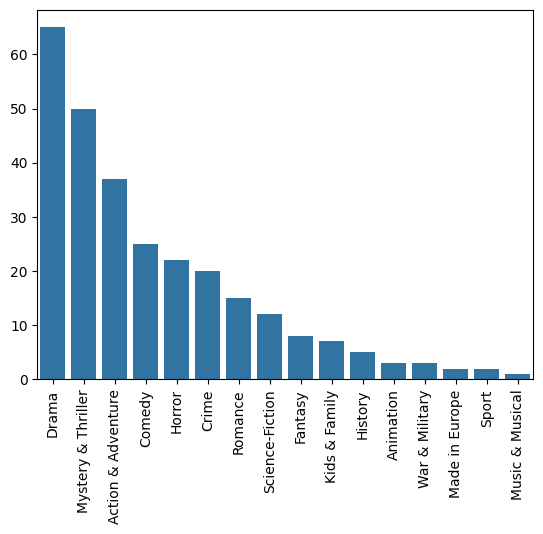

In [ ]:
# Sort the dictionary by values and create a new dictionary
sorted_dict_movie = {k: v for k, v in sorted(movie_gen.items(), key=lambda item: item[1],reverse=True)}


#plot bar graph for each genre and its count
sns.barplot(x=list(sorted_dict_movie.keys()), y=list(sorted_dict_movie.values()))
plt.xticks(rotation=90)
plt.show()


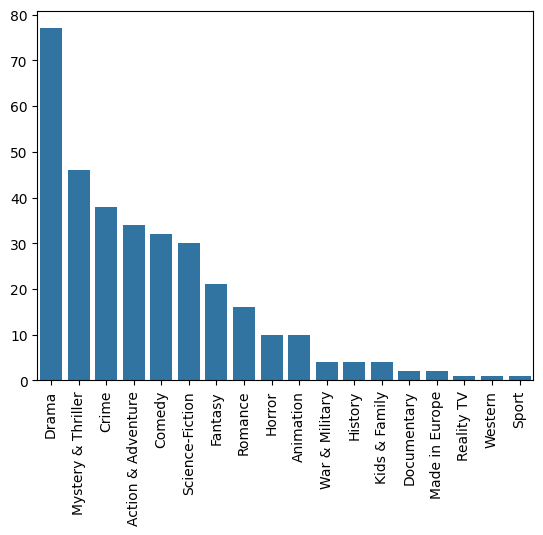

In [ ]:


# Sort the dictionary by values and create a new dictionary
sorted_dict_tv = {k: v for k, v in sorted(tv_gen.items(), key=lambda item: item[1],reverse=True)}

#plot bar graph for each genre and its count
sns.barplot(x=list(sorted_dict_tv.keys()), y=list(sorted_dict_tv.values()))
plt.xticks(rotation=90)
plt.show()



## **Finding Predominant Streaming Service**

In [ ]:
#storing all streaming platforms for different tv_shows
stream_list = []
for stream_platform in tv_df['streaming platform']:
  stream_list.extend(stream_platform)

print(len(stream_list))



#creating a dictionary where key is streaming platform name and value is count of that straming platform
dict_stream = {}
for ele in stream_list:
  if ele in dict_stream:
    dict_stream[ele] += 1
  else:
    dict_stream[ele] = 1

print(dict_stream)

128
{'Amazon Prime Video': 19, 'Hotstar': 17, 'Jio Cinema': 17, 'Zee5': 4, 'Netflix': 36, 'Alt Balaji': 3, 'Crunchyroll': 4, 'Crunchyroll Amazon Channel': 4, 'Anime Times Amazon Channel': 5, 'VI movies and tv': 5, 'Apple TV+': 1, 'N/A': 4, 'MX Player': 2, 'Amazon miniTV': 1, 'Sun Nxt': 1, 'Sony Liv': 2, 'Lionsgate Play': 1, 'Lionsgate Play Apple TV Channel': 1, 'Lionsgate Play Amazon Channel': 1}


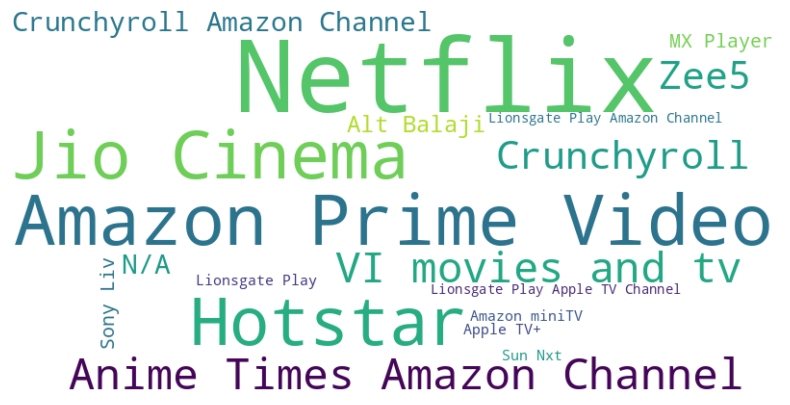

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud

# Convert the list into a dictionary for wordcloud input
service_dict = dict_stream

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(service_dict)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
movie_df.to_csv('Final Data movie.csv', index=False)

tv_df.to_csv('Final Data tv.csv', index=False)

In [ ]:
#saving filter data as Filter Data in csv format
tv_shows_last2years.to_csv('2022 beyond Data tv.csv', index=False)

movie_df[movie_df['Movie_Year'] > 2022].to_csv('2022 beyond Data movie.csv', index=False)

# **Dataset Drive Link (View Access with Anyone) -**



scraped tv shows data from justwatch is stored in following link

https://drive.google.com/file/d/1Rr2MqmqKY5s1BlENNs1IGNnFcHY4hBNG/view?usp=drive_link

Scraped movies data is stored in following link

https://drive.google.com/file/d/1mgk5K86p8ghVrmntgXczan8MGQtYpM6F/view?usp=drive_link

TV shows Released after year 2022

https://drive.google.com/file/d/1SWUkmXqnfYMGWIXuQpkzxbUpVe6H2BXy/view?usp=drive_link

Movies Released after 2022

https://drive.google.com/file/d/1iwybpEd97CTp-BzE__Dg_oU63BdBOLf_/view?usp=drive_link

# ***Congratulations!!! You have completed your Assignment.***